### 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

In [2]:
# pip install -U kaleido

Kaleido is required by Plotly to export static images (like PNG, JPEG, SVG) because it acts as the rendering engine that converts interactive Plotly figures into downloadable image files.

In [3]:
import plotly.io as pio
pio.renderers.default = "png"

Set the Plotly renderer to "png" so that all visualizations appear as static images instead of interactive JavaScript charts. 
This ensures the graphs are visible when viewing the notebook on GitHub or other non-interactive platforms.

In [4]:
# Load dataset from 'Our World in Data' website  

url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(url)

# df = pd.read_excel('COVID-19 cases dataset.xlsx')

In [5]:
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


* Loaded the latest global COVID-19 dataset from Our World in Data.
* The dataset contains daily records of cases, deaths, vaccinations, and socioeconomic indicators for each country.

### 2: Initial Inspection

In [6]:
print(df.shape)         # Rows & columns

(535365, 61)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535365 entries, 0 to 535364
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     535365 non-null  object 
 1   date                                        535365 non-null  object 
 2   total_cases                                 521655 non-null  float64
 3   new_cases                                   518289 non-null  float64
 4   new_cases_smoothed                          517084 non-null  float64
 5   total_cases_per_million                     521655 non-null  float64
 6   new_cases_per_million                       518289 non-null  float64
 7   new_cases_smoothed_per_million              517084 non-null  float64
 8   total_deaths                                521655 non-null  float64
 9   new_deaths                                  519181 non-null  float64
 

In [8]:
df.describe()           # Summary statistics

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,5.216550e+05,5.182890e+05,5.170840e+05,521655.000000,518289.000000,517084.000000,5.216550e+05,519181.000000,517969.000000,521655.000000,...,5.181620e+05,509775.000000,511877.000000,513972.000000,418146.000000,343164.000000,451723.000000,242579.000000,323856.000000,0.0
mean,1.419737e+07,1.048679e+04,1.051127e+04,130675.892179,98.315012,98.548009,1.548066e+05,100.201319,100.437950,925.132382,...,1.315285e+08,379.799344,31.175162,73.452612,22511.361277,14.014258,9.058838,59.254551,3.182547,NaN
std,7.383716e+07,1.170414e+05,9.995399e+04,175080.631346,976.746207,503.102177,7.760073e+05,802.185640,738.860768,1181.561188,...,6.685543e+08,1728.256839,9.665669,7.655924,22547.044922,20.816119,5.235474,31.877927,2.566298,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,5.130000e+02,0.136470,14.298000,18.817699,708.178284,0.000000,1.100000,3.440189,0.300000,NaN
25%,9.109000e+03,0.000000e+00,0.000000e+00,3011.067400,0.000000,0.000000,7.000000e+01,0.000000,0.000000,43.118597,...,4.553740e+05,36.265862,22.243999,68.748703,5155.620117,0.452137,5.600000,26.200474,1.320000,NaN
50%,8.576100e+04,0.000000e+00,4.428571e+00,47497.320000,0.000000,0.819707,1.021000e+03,0.000000,0.000000,390.357400,...,6.035104e+06,92.084663,31.683001,74.695999,14740.009766,2.718295,7.400000,70.153603,2.600000,NaN
75%,1.070188e+06,6.100000e+01,1.932857e+02,194667.420000,7.043576,31.560000,1.237300e+04,0.000000,1.857143,1450.483600,...,2.971544e+07,237.470367,39.080002,78.788101,34663.496094,21.365259,11.100000,88.469353,4.260000,NaN
max,7.786526e+08,8.401906e+06,6.402033e+06,769806.800000,230762.550000,37463.746000,7.101788e+06,57167.000000,14820.714000,6603.648000,...,8.021407e+09,21344.242188,59.875000,85.746399,117746.992188,85.317673,30.799999,100.000000,13.800000,NaN


* This step helps understand the structure, data types, and numeric summary statistics.
* It also helps identify missing values, incorrect data types, and data consistency issues.

### 3: Handle Missing & Irrelevant Columns

In [9]:
df.isna().sum().sort_values(ascending=False).head(20)  # identify missing values

human_development_index                    535365
weekly_icu_admissions                      524372
weekly_icu_admissions_per_million          524372
excess_mortality_cumulative_per_million    521662
excess_mortality_cumulative_absolute       521628
excess_mortality_cumulative                521628
excess_mortality                           521628
weekly_hosp_admissions_per_million         510868
weekly_hosp_admissions                     510868
icu_patients_per_million                   496249
icu_patients                               496249
hosp_patients                              494709
hosp_patients_per_million                  494709
total_boosters                             476581
total_boosters_per_hundred                 476581
new_vaccinations                           466489
new_tests                                  459962
new_tests_per_thousand                     459962
people_fully_vaccinated                    458354
people_fully_vaccinated_per_hundred        458354


* We will keep only the most relevant columns for analysis

In [10]:
# Select relevant columns for analysis

columns = [
    "country", "date",
    "total_cases", "new_cases", "total_deaths", "new_deaths",
    "total_cases_per_million", "total_deaths_per_million",
    "total_vaccinations", "people_fully_vaccinated",
    "people_fully_vaccinated_per_hundred",
    "new_vaccinations", "total_tests_per_thousand",
    "stringency_index",
    "population", "gdp_per_capita",
    "population_density", "median_age"
]

df = df[columns]

* Removed irrelevant or highly incomplete columns to focus the analysis on essential epidemiological and socioeconomic indicators

In [11]:
df

,country,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,new_vaccinations,total_tests_per_thousand,stringency_index,population,gdp_per_capita,population_density,median_age
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40578847.0,1516.273315,62.215549,16.752001
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40578847.0,1516.273315,62.215549,16.752001
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40578847.0,1516.273315,62.215549,16.752001
3,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,40578847.0,1516.273315,62.215549,16.752001
4,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,40578847.0,1516.273315,62.215549,16.752001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535360,Zimbabwe,2025-09-24,266436.0,0.0,5740.0,0.0,16580.682,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,2207.957031,41.538223,17.683001
535361,Zimbabwe,2025-09-25,266436.0,0.0,5740.0,0.0,16580.682,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,2207.957031,41.538223,17.683001
535362,Zimbabwe,2025-09-26,266436.0,0.0,5740.0,0.0,16580.682,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,2207.957031,41.538223,17.683001
535363,Zimbabwe,2025-09-27,266436.0,0.0,5740.0,0.0,16580.682,357.2082,NaN,NaN,NaN,NaN,NaN,NaN,16069061.0,2207.957031,41.538223,17.683001


#### Convert Data Types

In [12]:
# Convert date to datetime format for easy plotting
df.loc[:, 'date'] = pd.to_datetime(df['date'])

Converted the date column to datetime format for proper time-series analysis

#### Handle Missing Numerical Data

In [13]:
# Fill missing numerical values using forward fill (for continuity in time series)

# Sort by country and date
df = df.sort_values(['country', 'date'])

# Forward fill numeric columns only
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df.groupby('country')[num_cols].ffill()

# After forward fill, remaining NaNs can be filled with 0
pd.set_option('future.no_silent_downcasting', True)
df = df.fillna(0).infer_objects(copy=False)

In [14]:
df.head()

,country,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,new_vaccinations,total_tests_per_thousand,stringency_index,population,gdp_per_capita,population_density,median_age
0,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40578847.0,1516.273315,62.215549,16.752001
1,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40578847.0,1516.273315,62.215549,16.752001
2,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40578847.0,1516.273315,62.215549,16.752001
3,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40578847.0,1516.273315,62.215549,16.752001
4,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40578847.0,1516.273315,62.215549,16.752001


Handled missing values by forward-filling within each country’s timeline to preserve temporal consistency. 
Remaining nulls were replaced with zeros for stability during analysis.

In [15]:
df["country"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia excl. China',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England

In [16]:
# Define list of selected countries for the projection
countries = ['India', 'United States', 'Russia', 'Brazil', 'South Africa', 'France', 'United Kingdom']

In [17]:
# Filter dataset for these countries
df = df[df['country'].isin(countries)]

In [18]:
df.head()

,country,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,new_vaccinations,total_tests_per_thousand,stringency_index,population,gdp_per_capita,population_density,median_age
65117,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210306411.0,15093.464844,25.161867,33.506001
65118,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210306411.0,15093.464844,25.161867,33.506001
65119,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210306411.0,15093.464844,25.161867,33.506001
65120,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210306411.0,15093.464844,25.161867,33.506001
65121,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210306411.0,15093.464844,25.161867,33.506001


Filtered the global dataset to include only seven representative countries across different continents and socioeconomic backgrounds — India, United States, Russia, Brazil, South Africa, France, and the United Kingdom.

This selection allows for meaningful cross-country comparison of COVID-19 trends, vaccination rates, and policy effectiveness

### Check and Remove Duplicates

In [19]:
df.shape

(14746, 18)

In [20]:
df = df.drop_duplicates(subset=["country", "date"])

In [21]:
df.shape

(14746, 18)

### 4.Exploratory Data Analysis (EDA)

In [22]:
#### Time Period Check

In [23]:
df['date'].min(), df['date'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2025-12-31 00:00:00'))

Checking the date range ensures uniformity in time coverage across all countries. 
The dataset typically spans from early 2020 to the latest update(2025), enabling multi-year comparative analysis.

####  Total Cases & Deaths by Country

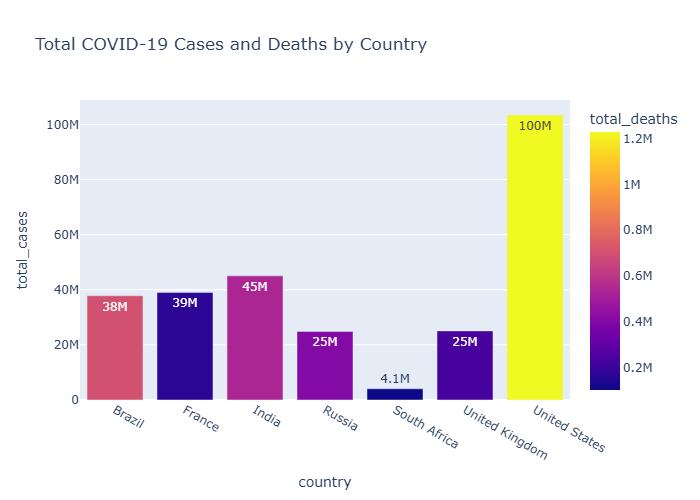

In [24]:
import plotly.express as px

total_stats = (
    df.groupby('country')
    .agg({'total_cases': 'max', 'total_deaths': 'max'})
    .reset_index()
)

fig = px.bar(
    total_stats,
    x='country', y='total_cases',
    color='total_deaths',
    title='Total COVID-19 Cases and Deaths by Country',
    text_auto='.2s'
)
fig.show()

This visualization highlights the overall scale of the pandemic across countries. 
The United States leads in both total cases and deaths, followed by India and Brazil. 
This indicates high infection spread in large-population countries with urban density challenges

#### Daily Case Trends

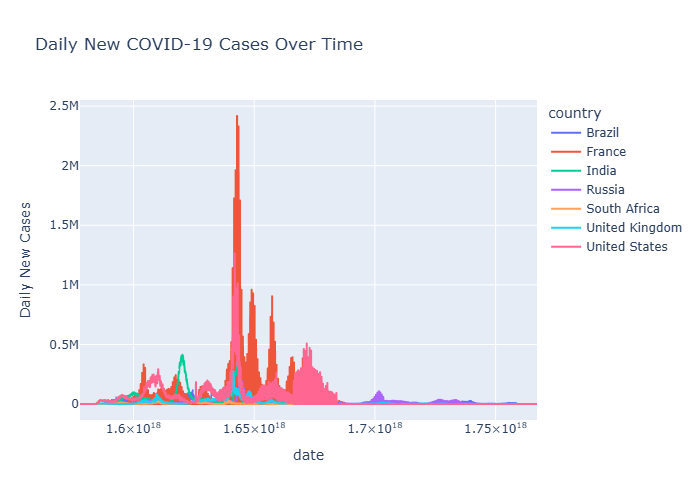

In [25]:
fig = px.line(
    df,
    x='date', y='new_cases',
    color='country',
    title='Daily New COVID-19 Cases Over Time',
    labels={'new_cases': 'Daily New Cases'}
)
fig.show()

The daily case trend reveals the waves of infection. 
Notice multiple peaks corresponding to major global surges (mainly due to the outbreak of new variants like Delta, Omicron, etc.). 
France, India and the U.S. show strong peaks, reflecting national-level outbreaks aligned with global timelines.

#### Death Trends

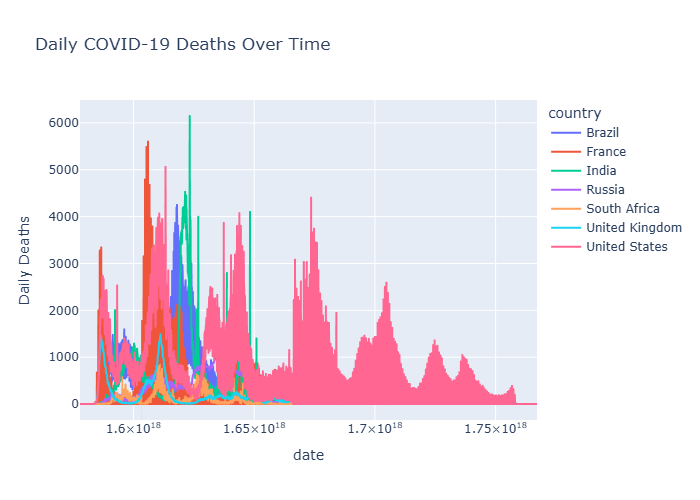

In [26]:
fig = px.line(
    df,
    x='date', y='new_deaths',
    color='country',
    title='Daily COVID-19 Deaths Over Time',
    labels={'new_deaths': 'Daily Deaths'}
)
fig.show()

Death curves tend to lag behind case peaks. 
Western countries such as the U.S., U.K., and France show early mortality spikes (2020–2021), while India and Brazil exhibit delayed surges tied to healthcare strain and variant spread

#### Vaccination Progress Comparison

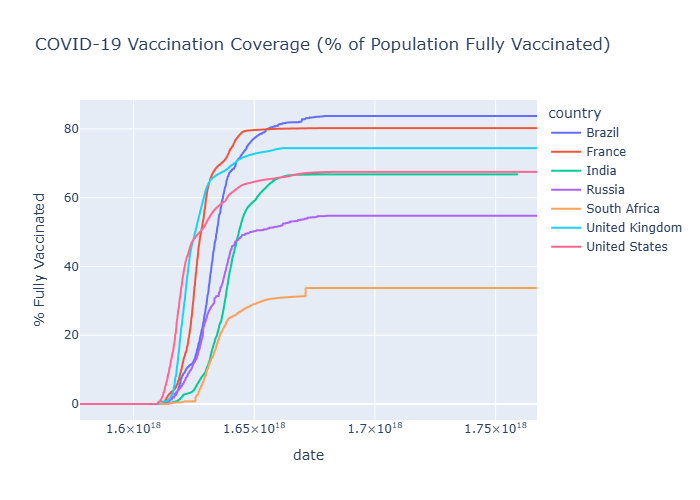

In [27]:
fig = px.line(
    df,
    x='date', y='people_fully_vaccinated_per_hundred',
    color='country',
    title='COVID-19 Vaccination Coverage (% of Population Fully Vaccinated)',
    labels={'people_fully_vaccinated_per_hundred': '% Fully Vaccinated'}
)
fig.show()

This comparison shows how developed nations like the U.K. and France achieved higher early vaccination rates, while developing countries such as India and South Africa showed slower initial rollouts due to logistical and supply challenges.

#### Testing & Stringency Correlation

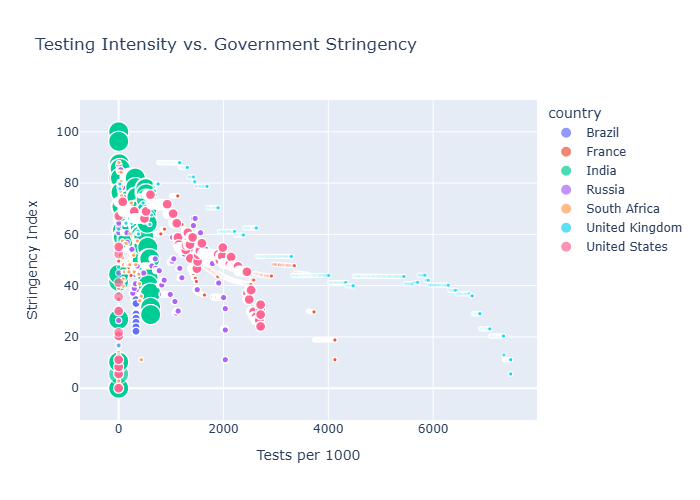

In [28]:
fig = px.scatter(
    df,
    x='total_tests_per_thousand',
    y='stringency_index',
    color='country',
    size='population',
    title='Testing Intensity vs. Government Stringency',
    labels={'total_tests_per_thousand': 'Tests per 1000', 'stringency_index': 'Stringency Index'}
)
fig.show()

countries with higher testing rates (like the UK and US) had lower government stringency, 
while nations with lower testing (like India and South Africa) relied on stricter restrictions to control the pandemic.

#### GDP vs Total Cases per Million

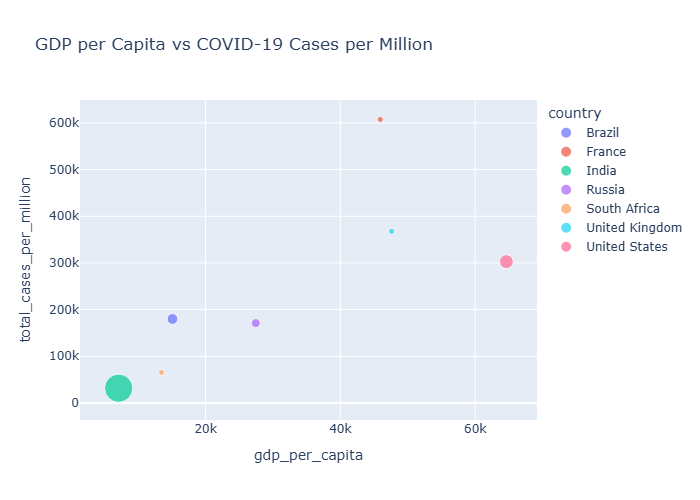

In [29]:
latest = df.loc[df.groupby('country')['date'].idxmax()].reset_index(drop=True)

fig = px.scatter(
    latest,
    x='gdp_per_capita',
    y='total_cases_per_million',
    color='country',
    size='population',
    title='GDP per Capita vs COVID-19 Cases per Million'
)
fig.show()


Richer nations often reported more cases per million due to better testing infrastructure and reporting accuracy. 
However, this does not necessarily reflect higher infection severity.

#### Median Age vs Deaths per Million

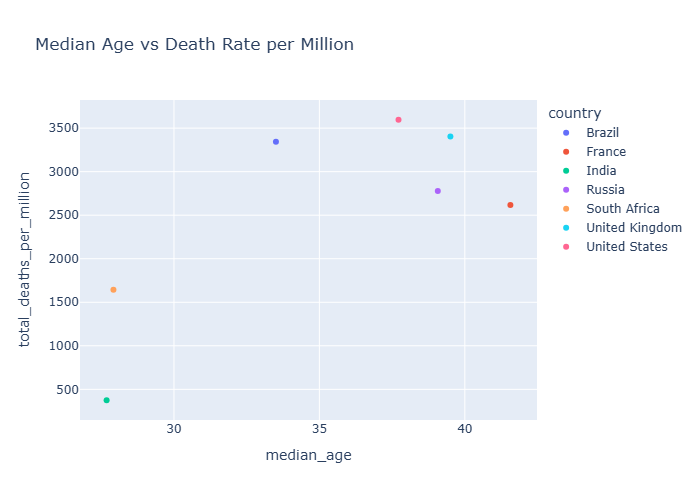

In [30]:
fig = px.scatter(
    latest,
    x='median_age',
    y='total_deaths_per_million',
    color='country',
    title='Median Age vs Death Rate per Million'
)
fig.show()

Countries with older populations (like France and the U.K.) tend to have higher death rates, confirming age as a key vulnerability factor in COVID-19 outcomes

Exceptions -  South Africa, which has a relatively low median age but a moderate death rate

#### Correlation Heatmap

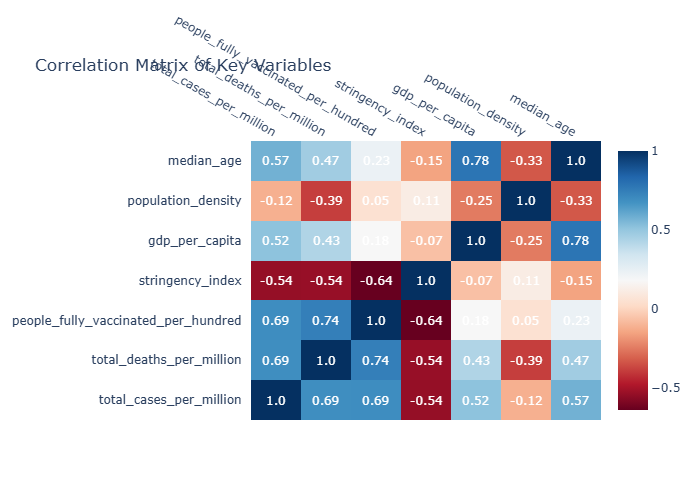

In [31]:
import plotly.figure_factory as ff

corr_cols = [
    "total_cases_per_million", "total_deaths_per_million",
    "people_fully_vaccinated_per_hundred", "stringency_index",
    "gdp_per_capita", "population_density", "median_age"
]

corr = df[corr_cols].corr()
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True,
    colorscale='RdBu'
)
fig.update_layout(title='Correlation Matrix of Key Variables')
fig.show()

The correlation matrix shows that median age and GDP per capita are strongly correlated with total deaths per million, suggesting older and wealthier countries had higher death rates. 

The stringency index is negatively correlated with vaccination and outcomes, indicating stricter measures often align with fewer deaths and cases. 

Population density and stringency index show weak correlations with most variables, meaning their impact is less clear compared to age and GDP.

### 5.Interactive Dashboard with Plotly Dash

In [37]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

#  Load and Prepare Dataset
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(url)

columns = [
    "country", "date",
    "total_cases", "new_cases", "total_deaths", "new_deaths",
    "total_cases_per_million", "total_deaths_per_million",
    "total_vaccinations", "people_fully_vaccinated",
    "people_fully_vaccinated_per_hundred",
    "new_vaccinations", "total_tests_per_thousand",
    "stringency_index",
    "population", "gdp_per_capita",
    "population_density", "median_age"
]
df = df[columns]

countries = ['India', 'United States', 'Russia', 'Brazil', 'South Africa', 'France', 'United Kingdom']
df = df[df['country'].isin(countries)]

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['country', 'date'])

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df.groupby('country')[num_cols].ffill()
df = df.fillna(0).infer_objects(copy=False)

# Initialize App
app = Dash(__name__)
app.title = "COVID-19 Interactive Dashboard"

# Layout
app.layout = html.Div([
    html.H1("COVID-19 Interactive Dashboard", style={'textAlign': 'center'}),
    
    # Input Controls
    html.Div([
        html.Div([
            html.Label("Select Countries:"),
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': c, 'value': c} for c in countries],
                value=['India', 'United States'],
                multi=True
            ),
        ], style={'width': '45%', 'display': 'inline-block', 'padding': '10px'}),
        
        html.Div([
            html.Label("Select Date Range:"),
            dcc.DatePickerRange(
                id='date-picker',
                start_date=df['date'].min(),
                end_date=df['date'].max(),
                display_format='YYYY-MM-DD'
            ),
        ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
        
    ], style={'display': 'flex', 'justify-content': 'space-around'}),
    
    html.Div([
        html.Div([
            html.Label("Y-axis Scale:"),
            dcc.Checklist(
                id='log-scale',
                options=[{'label': 'Use Log Scale', 'value': 'log'}],
                value=[],
                inline=True
            )
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
        
        html.Div([
            html.Label("Cases/Deaths Type:"),
            dcc.RadioItems(
                id='cases-type',
                options=[
                    {'label': 'Daily', 'value': 'daily'},
                    {'label': 'Cumulative', 'value': 'cumulative'}
                ],
                value='daily',
                labelStyle={'display': 'inline-block', 'margin-right': '10px'}
            )
        ], style={'width': '60%', 'display': 'inline-block', 'padding': '10px'})
    ], style={'display': 'flex', 'justify-content': 'space-around'}),
    
    # Graphs
    dcc.Graph(id='daily-cases'),
    dcc.Graph(id='daily-deaths'),
    dcc.Graph(id='vaccination-progress'),
    dcc.Graph(id='cases-vs-deaths'),

    html.H2("Additional Insights", style={'textAlign': 'center', 'marginTop': 30}),
    dcc.Graph(id='stringency-trend'),
    dcc.Graph(id='gdp-vs-vaccine'),
    dcc.Graph(id='density-vs-cases'),
    dcc.Graph(id='animated-trend')
])

# Callbacks
@app.callback(
    [Output('daily-cases', 'figure'),
     Output('daily-deaths', 'figure'),
     Output('vaccination-progress', 'figure'),
     Output('cases-vs-deaths', 'figure'),
     Output('stringency-trend', 'figure'),
     Output('gdp-vs-vaccine', 'figure'),
     Output('density-vs-cases', 'figure'),
     Output('animated-trend', 'figure')],
    [Input('country-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date'),
     Input('log-scale', 'value'),
     Input('cases-type', 'value')]
)
def update_charts(selected_countries, start_date, end_date, log_scale, cases_type):
    filtered = df[df['country'].isin(selected_countries)]
    filtered = filtered[(filtered['date'] >= start_date) & (filtered['date'] <= end_date)]
    
    if cases_type == 'cumulative':
        filtered['new_cases'] = filtered.groupby('country')['new_cases'].cumsum()
        filtered['new_deaths'] = filtered.groupby('country')['new_deaths'].cumsum()
    
    yaxis_type = "log" if 'log' in log_scale else "linear"
    
    # Graph 1: Cases
    fig_cases = px.line(
        filtered, x='date', y='new_cases', color='country',
        title=f"{cases_type.title()} COVID-19 Cases"
    )
    fig_cases.update_yaxes(type=yaxis_type)
    
    # Graph 2: Deaths
    fig_deaths = px.line(
        filtered, x='date', y='new_deaths', color='country',
        title=f"{cases_type.title()} COVID-19 Deaths"
    )
    fig_deaths.update_yaxes(type=yaxis_type)
    
    # Graph 3: Vaccination Progress
    fig_vaccine = px.line(
        filtered, x='date', y='people_fully_vaccinated_per_hundred', color='country',
        title='Vaccination Coverage (% Fully Vaccinated)'
    )
    
    # Graph 4: Cases vs Deaths
    latest = filtered.groupby('country').apply(lambda x: x.loc[x['date'].idxmax()]).reset_index(drop=True)
    fig_cases_vs_deaths = px.scatter(
        latest, x='total_cases_per_million', y='total_deaths_per_million',
        size='population', color='country',
        title='Total Cases vs Deaths per Million (Bubble size = Population)'
    )
    
    # Graph 5: Stringency Index Trend
    fig_stringency = px.line(
        filtered, x='date', y='stringency_index', color='country',
        title='Government Stringency Index Over Time'
    )
    
    # Graph 6: GDP vs Vaccination
    fig_gdp_vaccine = px.scatter(
        latest, x='gdp_per_capita', y='people_fully_vaccinated_per_hundred',
        size='population', color='country',
        title='GDP per Capita vs Vaccination Rate',
        trendline='ols'
    )
    
    # Graph 7: Population Density vs Cases
    fig_density = px.scatter(
        latest, x='population_density', y='total_cases_per_million',
        color='country', size='population',
        title='Population Density vs Cases per Million',
        trendline='ols'
    )
    
    # Graph 8: Animated Global Trend
    fig_animated = px.scatter(
        filtered, x='total_cases_per_million', y='total_deaths_per_million',
        animation_frame='date', color='country',
        size='population', title='COVID-19 Progression Over Time (Animated)',
        log_x=True, log_y=True, range_x=[10, 1e6], range_y=[1, 1e5]
    )
    
    return (fig_cases, fig_deaths, fig_vaccine, fig_cases_vs_deaths,
            fig_stringency, fig_gdp_vaccine, fig_density, fig_animated)

# Run
if __name__ == '__main__':
    app.run(debug=True)
